In [5]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from scipy import stats

In [6]:
METRICS_DIR='../results/metrics/'

In [7]:
csv_df = []
for csv in os.listdir(METRICS_DIR):
    df = pd.read_csv(METRICS_DIR+csv, index_col=None, header=0)
    csv_df.append(df)

In [17]:
frame = pd.concat(csv_df, axis=0, ignore_index=True)
search_algorithms_frame = frame[frame["maze_algorithm"].isin(["BFS", "DFS", "A*"])]

In [9]:
plt.style.use('fivethirtyeight')
sns.set_palette("Paired")
plt.figure(figsize=(16, 12))

<Figure size 1600x1200 with 0 Axes>

<Figure size 1600x1200 with 0 Axes>

In [18]:
print(search_algorithms_frame.dtypes)

maze_title            object
maze_algorithm        object
maze_height            int64
maze_width             int64
path_length            int64
nodes_available      float64
iterations           float64
policy_changes       float64
states_evaluated     float64
execution_time       float64
is_solution_found       bool
current_memory         int64
peak_memory            int64
current_memory_mb    float64
peak_memory_mb       float64
nodes_explored       float64
dtype: object


In [20]:
print(search_algorithms_frame.shape)

(54, 16)


In [21]:
search_algorithms_frame.iloc[:5,]

,maze_title,maze_algorithm,maze_height,maze_width,path_length,nodes_available,iterations,policy_changes,states_evaluated,execution_time,is_solution_found,current_memory,peak_memory,current_memory_mb,peak_memory_mb,nodes_explored
1,maze19,BFS,19,19,49,169.0,NaN,NaN,NaN,0.000927,True,3345,7131,0.003190,0.006801,102.0
2,maze15,A*,15,15,43,101.0,NaN,NaN,NaN,0.000767,True,3201,9137,0.003053,0.008714,61.0
3,maze89,A*,89,89,1397,3871.0,NaN,NaN,NaN,0.039116,True,228593,502537,0.218003,0.479257,2549.0
5,maze45,DFS,45,45,399,1043.0,NaN,NaN,NaN,0.008651,True,32641,235467,0.031129,0.224559,889.0
7,maze21,DFS,21,21,109,211.0,NaN,NaN,NaN,0.001795,True,8049,19203,0.007676,0.018313,197.0


In [22]:
search_algorithms_frame.groupby(["maze_algorithm", "maze_height"])["path_length"].max()

maze_algorithm  maze_height
A*              7                13
                9                13
                11               25
                13               49
                15               43
                17               73
                19               49
                21               37
                23               55
                25               73
                31               93
                45              123
                59              165
                67              147
                83              197
                89             1397
                101             269
BFS             7                13
                9                13
                11               25
                13               49
                15               43
                17               73
                19               49
                21               37
                23               55
                25               73


In [23]:
search_algorithms_frame.groupby("maze_algorithm")["path_length"].min()

maze_algorithm
A*     13
BFS    13
DFS    13
Name: path_length, dtype: int64

In [25]:
search_algorithms_frame.groupby(["maze_algorithm", "maze_height"])["nodes_explored"].max()

maze_algorithm  maze_height
A*              7                13.0
                9                13.0
                11               43.0
                13               53.0
                15               61.0
                17               91.0
                19               80.0
                21               48.0
                23              127.0
                25              176.0
                31              471.0
                45              783.0
                59             1116.0
                67              430.0
                83             2271.0
                89             2549.0
                101            3984.0
BFS             7                13.0
                9                20.0
                11               45.0
                13               61.0
                15               93.0
                17              121.0
                19              102.0
                21              171.0
                23    

In [26]:
search_algorithms_frame.groupby("maze_algorithm")["nodes_explored"].min()

maze_algorithm
A*     13.0
BFS    13.0
DFS    13.0
Name: nodes_explored, dtype: float64

In [27]:
search_algorithms_frame.groupby(["maze_height", "maze_algorithm"])["nodes_explored"].max()

maze_height  maze_algorithm
7            A*                  13.0
             BFS                 13.0
             DFS                 13.0
9            A*                  13.0
             BFS                 20.0
             DFS                 20.0
11           A*                  43.0
             BFS                 45.0
             DFS                 51.0
13           A*                  53.0
             BFS                 61.0
             DFS                 71.0
15           A*                  61.0
             BFS                 93.0
             DFS                 85.0
17           A*                  91.0
             BFS                121.0
             DFS                119.0
19           A*                  80.0
             BFS                102.0
             DFS                 70.0
21           A*                  48.0
             BFS                171.0
             DFS                197.0
23           A*                 127.0
             BFS      

<Axes: xlabel='maze_height', ylabel='nodes_explored'>

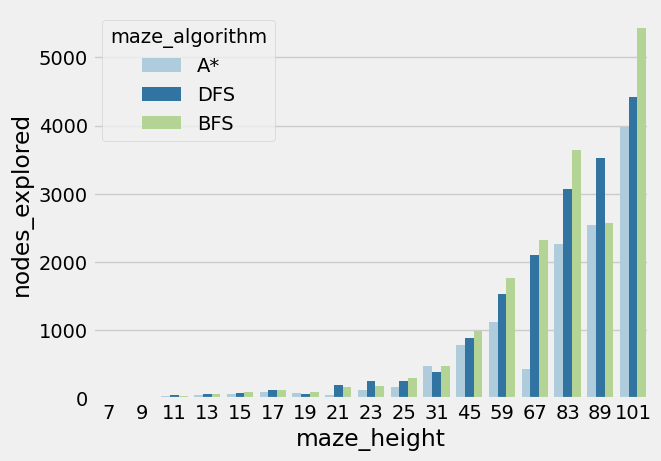

In [29]:
sns.barplot(x='maze_height', y='nodes_explored', hue='maze_algorithm', data=search_algorithms_frame)

<Axes: xlabel='maze_height', ylabel='path_length'>

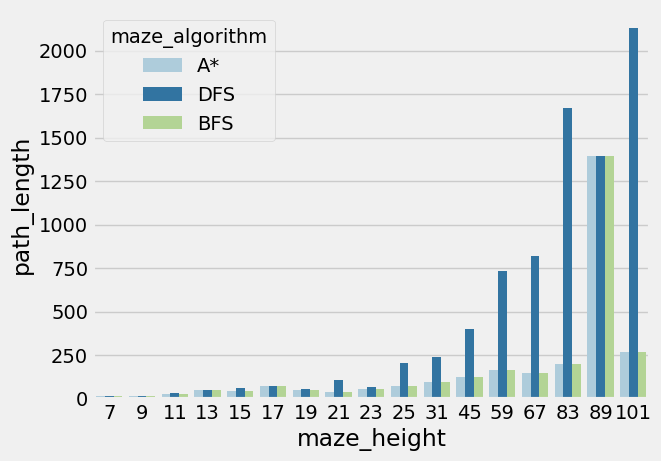

In [30]:
sns.barplot(x='maze_height', y='path_length', hue='maze_algorithm', data=search_algorithms_frame)

<Axes: xlabel='maze_height', ylabel='execution_time'>

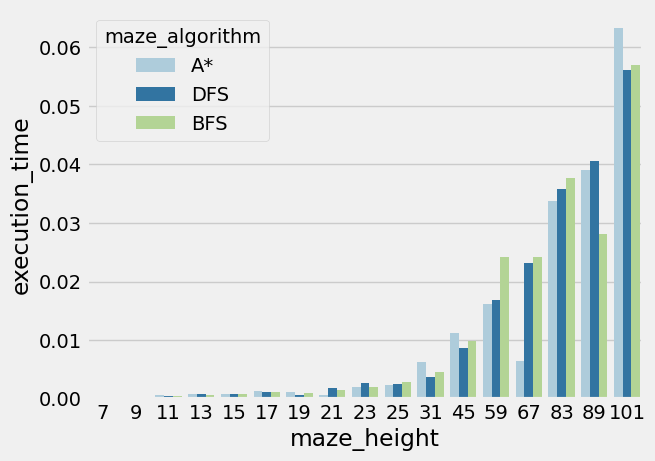

In [31]:
sns.barplot(x='maze_height', y='execution_time', hue='maze_algorithm', data=search_algorithms_frame)

<Axes: xlabel='maze_height', ylabel='peak_memory_mb'>

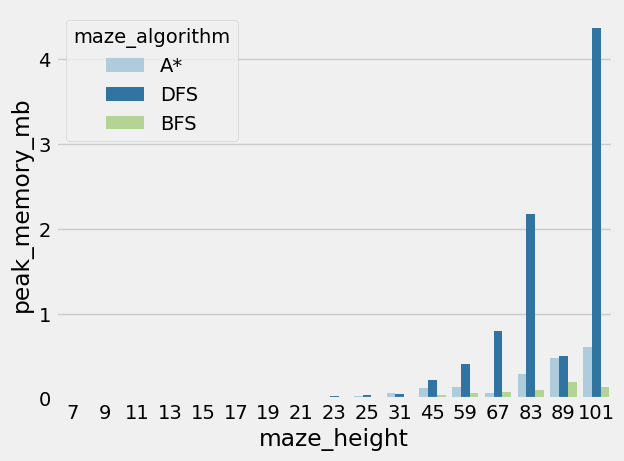

In [32]:
sns.barplot(x='maze_height', y='peak_memory_mb', hue='maze_algorithm', data=search_algorithms_frame)

<Axes: xlabel='nodes_available', ylabel='nodes_explored'>

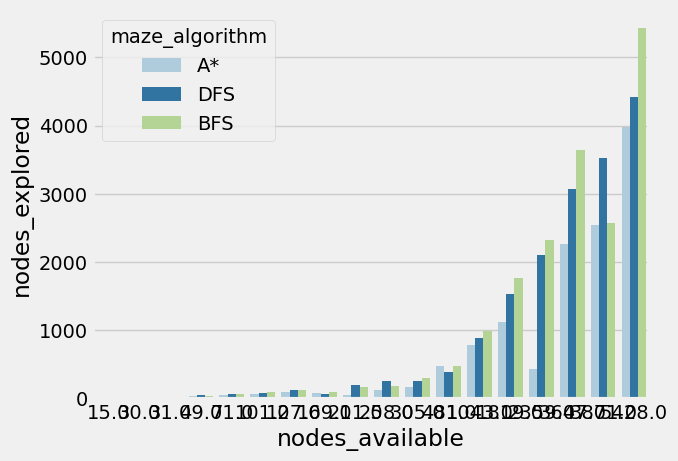

In [33]:
sns.barplot(x='nodes_available', y='nodes_explored', hue='maze_algorithm', data=search_algorithms_frame)

In [34]:
dfs = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "DFS"]
bfs = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "BFS"]
astar = search_algorithms_frame[search_algorithms_frame["maze_algorithm"] == "A*"]

<Axes: xlabel='execution_time', ylabel='nodes_explored'>

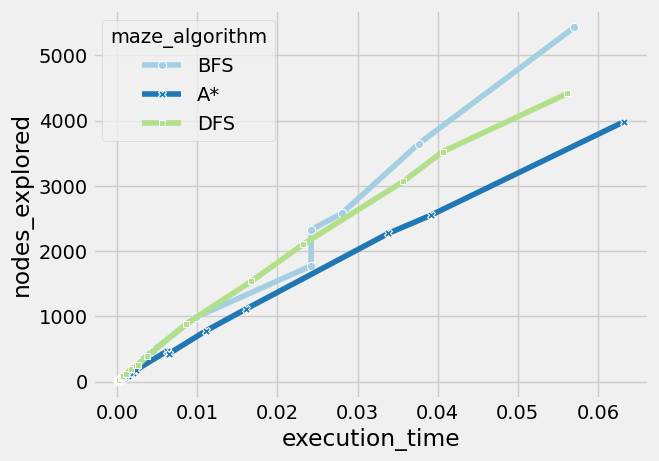

In [35]:
sns.lineplot(x="execution_time", y="nodes_explored", hue="maze_algorithm", style="maze_algorithm", markers=True, dashes=False, data=search_algorithms_frame)

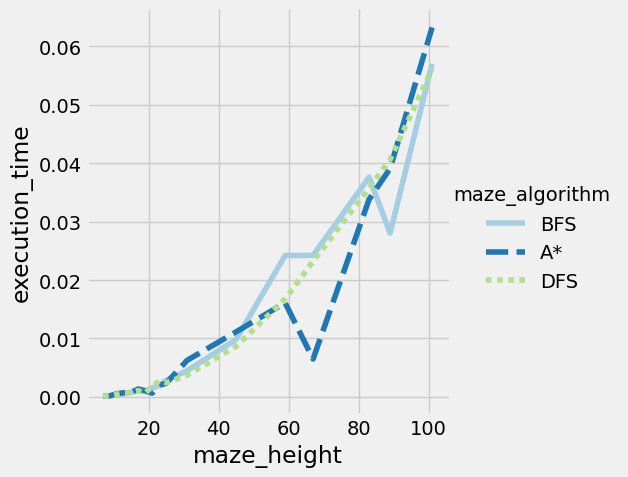

In [36]:
sns.relplot(
    data=search_algorithms_frame, x="maze_height", y="execution_time",
    hue="maze_algorithm", style="maze_algorithm",
    kind="line"
)